<a href="https://colab.research.google.com/github/ZenoZoldyck/ConvNets/blob/main/CIFAR_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.5.0'

In [2]:
# lets load in the data
(train_data, train_label), (test_data, test_label) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


In [3]:
# lets view our data
train_data[0], train_label[0]

(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],
 
        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],
 
        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],
 
        ...,
 
        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],
 
        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],
 
        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
  

In [4]:
len(train_data), len(test_data), train_data[0].shape, train_label[0].shape

(50000, 10000, (32, 32, 3), (1,))

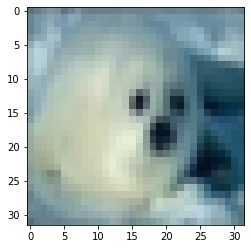

In [5]:
# visualize our data
plt.imshow(train_data[175])

In [6]:
train_label[175]

array([72])

In [7]:
# normalize our data
train_data_norm, test_data_norm = train_data / 255.0, test_data / 255.0

In [8]:
# Lest see the different types of classes in out dataset

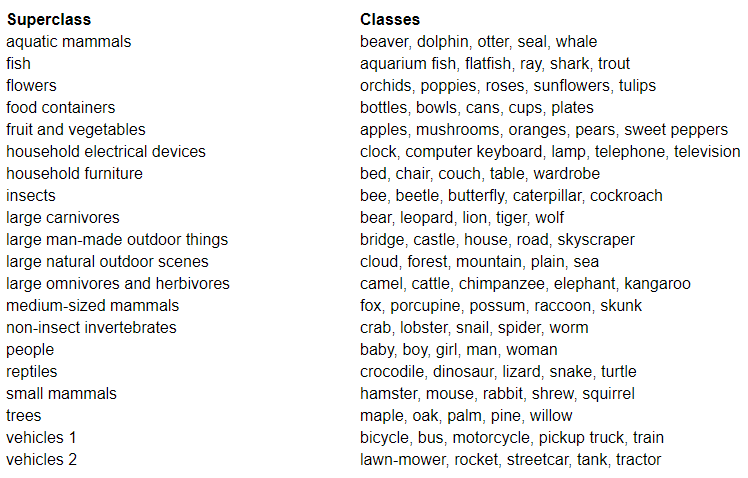

In [15]:
# time for model creation
tf.random.set_seed(42)
model = tf.keras.Sequential([
   tf.keras.layers.Conv2D(256, (3, 3), input_shape = (32, 32, 3), activation = "relu"),
   tf.keras.layers.MaxPooling2D((2, 2)),
   tf.keras.layers.Conv2D(256, (3, 3), activation = "relu"),
   tf.keras.layers.MaxPooling2D((2, 2)),
   tf.keras.layers.Conv2D(256, (3, 3), activation = "relu"),
   tf.keras.layers.Conv2D(256, (3, 3), activation = "relu"),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(128, activation = "relu"),
   tf.keras.layers.Dense(100, activation = "softmax")                          
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 256)       590080    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 256)         590080    
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 2, 2, 256)         590080    
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)             

In [16]:
# our mammoth model is ready
# time to compile

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

history = model.fit(train_data_norm, train_label, epochs = 25, validation_data = (test_data_norm, test_label))

Epoch 1/25
1563/1563 [==============================] - 16s 10ms/step - loss: 4.0539 - accuracy: 0.0706 - val_loss: 3.7221 - val_accuracy: 0.1210
Epoch 2/25
1563/1563 [==============================] - 15s 9ms/step - loss: 3.4836 - accuracy: 0.1664 - val_loss: 3.3059 - val_accuracy: 0.2007
Epoch 3/25
1563/1563 [==============================] - 15s 9ms/step - loss: 3.1541 - accuracy: 0.2259 - val_loss: 3.0915 - val_accuracy: 0.2455
Epoch 4/25
1563/1563 [==============================] - 14s 9ms/step - loss: 2.9269 - accuracy: 0.2719 - val_loss: 2.9375 - val_accuracy: 0.2764
Epoch 5/25
1563/1563 [==============================] - 14s 9ms/step - loss: 2.7504 - accuracy: 0.3052 - val_loss: 2.8819 - val_accuracy: 0.2898
Epoch 6/25
1563/1563 [==============================] - 14s 9ms/step - loss: 2.6040 - accuracy: 0.3359 - val_loss: 2.8171 - val_accuracy: 0.3049
Epoch 7/25
1563/1563 [==============================] - 15s 9ms/step - loss: 2.4779 - accuracy: 0.3620 - val_loss: 2.7636 - val_a

In [ ]:
# i have tried all kinds of structure and i am preety sure that we have less data.

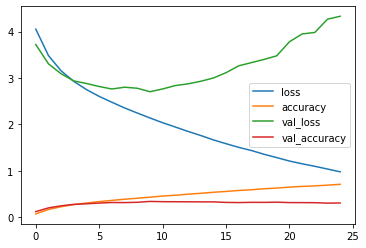

In [17]:
pd.DataFrame(history.history).plot()

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_label, tf.argmax(model.predict(test_data_norm), axis = 1))

array([[57,  1,  2, ...,  0,  0,  0],
       [ 1, 33,  0, ...,  0,  0,  0],
       [ 4,  0, 28, ...,  0,  6,  0],
       ...,
       [ 0,  1,  1, ..., 20,  2,  0],
       [ 0,  0,  7, ...,  0, 18,  2],
       [ 0,  0,  0, ...,  1,  3, 27]])